## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Segmenting MR Knee Images](https://sbonaretti.github.io/pyKNEEr/segmentation.html)

Segmentation is performed using an atlas-based algorithm. Given a segmented image (reference image), we use registration to segment each image (moving image) of the dataset. 

The segmentation consists of two parts:  
- Segment bone (used to initialize femoral cartilage segmentation)
- Segment cartilage

Each part is composed by 3 steps:  
- Step 1: *Register image to reference*. The moving image is registered to the reference image
- Step 2: *Invert transformation*. Transformations are inverted
- Step 3: *Warp reference mask to moving image*. Inverted transformations are applied to the mask of the reference image to obtain the mask of the moving image  

Registration, inversion, and warping are executed by calling *elastix*[1].

## Import packages

In [1]:
from pykneer import pykneer_io          as io
from pykneer import segmentation_for_nb as segm

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be segmented  
- `modality` can be "newsubject", "longitudinal", or "multimodal"
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)

In [2]:
input_file_name = "./image_list_multimodal.txt"
modality        = "multimodal" # use "newsubject", "longitudinal", or "multimodal" 
n_of_cores      = 2

#### Read image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [3]:
image_data = io.load_image_data_segmentation(modality, input_file_name)

-> image information loaded


## Reference image

The reference image is the number 9 of the current dataset. It was selected as a results of a convergence study described in the paper.
Here we check if femur mask and femur cartilage masks of the reference image are present

In [4]:
segm.prepare_reference(image_data)

01_DESS_01_prep.mha
-> Reference preparation completed


## Segment bone

#### 1. Register image to reference

In [5]:
segm.register_bone_to_reference(image_data, n_of_cores)

-> Registration completed
-> The total time was 25.62 seconds (about 0 min)


#### 2. Invert transformations

In [6]:
segm.invert_bone_transformations(image_data, n_of_cores)

-> Inversion completed
-> The total time was 9.91 seconds (about 0 min)


#### 3. Warp reference mask to moving image

In [7]:
segm.warp_bone_mask(image_data, n_of_cores)

-> Warping completed
-> The total time was 12.25 seconds (about 0 min)


## Segment cartilage

#### 1. Register image to reference

In [8]:
segm.register_cartilage_to_reference(image_data, n_of_cores)

-> Step skipped
-> Registration completed
-> The total time was 0.03 seconds (about 0 min)


#### 2. Invert transformations

In [9]:
segm.invert_cartilage_transformations(image_data, n_of_cores)

-> Step skipped
-> Inversion completed
-> The total time was 0.02 seconds (about 0 min)


#### 3. Warp reference mask to moving image (optional)

In [10]:
segm.warp_cartilage_mask(image_data, n_of_cores)

-> Warping completed
-> The total time was 11.83 seconds (about 0 min)


## Visualize segmentations
Visual check of the results. For each image (row), segmentation at medial, central, and lateral compartments

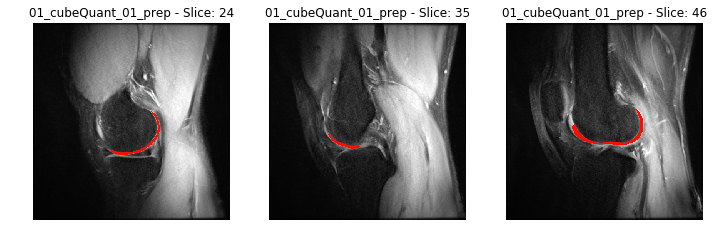

In [11]:
segm.show_segmented_images(image_data)

### References

[1] Klein S., Staring M., Murphy K., Viergever M.A., Pluim J.P.W. [*elastix: A Toolbox for Intensity-Based Medical Image Registration*](http://elastix.isi.uu.nl/marius/downloads/2010_j_TMI.pdf) IEEE Transactions on Medical Imaging. vol. 29, no. 1, pp. 196 - 205, January. 2010. 

### Dependencies

In [12]:
%load_ext watermark
print ("elastix 4.8.0\n")
%watermark -v -m -p SimpleITK,numpy,matplotlib,multiprocessing

elastix 4.8.0

CPython 3.7.1
IPython 7.2.0

SimpleITK unknown
numpy 1.16.1
matplotlib 2.2.3
multiprocessing unknown

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
